In [1]:
from Fea_1DCNN import Autoencoder
model = Autoencoder()

In [2]:
from Data_Set import data_set
from torch.utils.data import DataLoader
data = data_set(2,2)
dataloader = DataLoader(data, batch_size=8)
print(len(dataloader))
for item in dataloader:
  print(item.shape)
  break

450
torch.Size([8, 23, 512])


In [3]:
from Bi_LSTM import device
model = model.to(device)

In [4]:
import torch.nn as nn
import torch.optim as optim
epoch_num = 20
loss_fn = nn.MSELoss()
loss_ = []
optimizer_1 = optim.Adam(model.parameters(), lr=0.001)

In [5]:
from tqdm import tqdm
for epoch in range(epoch_num):
    print("epoch:\t", epoch+1)
    with tqdm(total=len(dataloader)) as pbar:
        for item in dataloader:
            item = item[:,14,:]
            # print(item.shape)
            item = item.unsqueeze(1)
            # print(item.shape)
            item = item.to(device)
            out,_ = model(item)
            loss = loss_fn(item, out)
            optimizer_1.zero_grad()      # 清空之前的梯度
            loss.backward()              # 梯度回传
            optimizer_1.step()           # 更新参数
            loss_.append(loss)
            pbar.update(1)

epoch:	 1


100%|██████████| 450/450 [00:01<00:00, 404.95it/s]


epoch:	 2


100%|██████████| 450/450 [00:00<00:00, 476.52it/s]


epoch:	 3


100%|██████████| 450/450 [00:00<00:00, 501.62it/s]


epoch:	 4


100%|██████████| 450/450 [00:00<00:00, 529.30it/s]


epoch:	 5


100%|██████████| 450/450 [00:00<00:00, 523.45it/s]


epoch:	 6


100%|██████████| 450/450 [00:00<00:00, 508.20it/s]


epoch:	 7


100%|██████████| 450/450 [00:00<00:00, 503.77it/s]


epoch:	 8


100%|██████████| 450/450 [00:00<00:00, 524.87it/s]


epoch:	 9


100%|██████████| 450/450 [00:00<00:00, 503.33it/s]


epoch:	 10


100%|██████████| 450/450 [00:00<00:00, 493.77it/s]


epoch:	 11


100%|██████████| 450/450 [00:00<00:00, 517.30it/s]


epoch:	 12


100%|██████████| 450/450 [00:00<00:00, 505.33it/s]


epoch:	 13


100%|██████████| 450/450 [00:00<00:00, 506.53it/s]


epoch:	 14


100%|██████████| 450/450 [00:00<00:00, 492.43it/s]


epoch:	 15


100%|██████████| 450/450 [00:00<00:00, 518.46it/s]


epoch:	 16


100%|██████████| 450/450 [00:00<00:00, 512.01it/s]


epoch:	 17


100%|██████████| 450/450 [00:00<00:00, 517.77it/s]


epoch:	 18


100%|██████████| 450/450 [00:00<00:00, 510.46it/s]


epoch:	 19


100%|██████████| 450/450 [00:00<00:00, 495.38it/s]


epoch:	 20


100%|██████████| 450/450 [00:00<00:00, 520.01it/s]


In [6]:
import torch
loss_ = torch.tensor(loss_)
loss_ = loss_.to('cpu')
print(loss_)

tensor([0.7213, 0.8731, 1.2504,  ..., 0.0400, 0.0402, 0.0472])


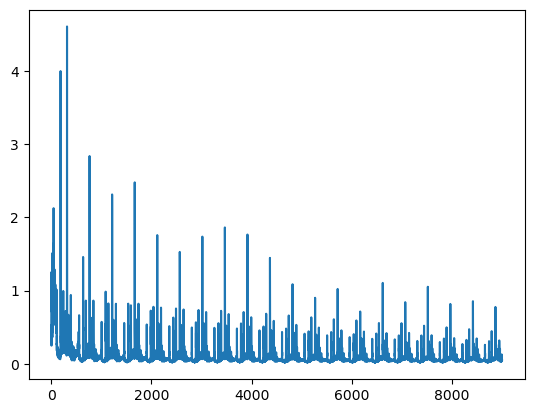

In [7]:
import matplotlib.pyplot as plt
plt.plot(loss_)
plt.show()

In [8]:
data_test = data_set(2,1)
dataloader_test= DataLoader(data_test, batch_size=8)
print(len(dataloader_test))
for item in dataloader_test:
  print(item.shape)
  break

225
torch.Size([8, 23, 512])


In [9]:
model.eval()
feature_data = []
k=0
for item in dataloader_test:
    item = item[:,14,:]
    # print(item.shape)
    item = item.unsqueeze(1)
    item = item.to(device)
    _,feature = model(item)
    k = k+1
    feature_data.append(feature.to('cpu').detach().numpy())
    if k==225:print(feature.shape)
print(k)    

torch.Size([8, 32])
225


In [10]:
import numpy as np
test_fea = np.array(feature_data)
print(test_fea.shape)
test_fea = test_fea.reshape(225*8,32)
print(test_fea.shape)

(225, 8, 32)
(1800, 32)


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_standardized = scaler.fit_transform(test_fea)

In [12]:
from sklearn.decomposition import PCA

# 假设我们希望降到2D以便于可视化
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_standardized)


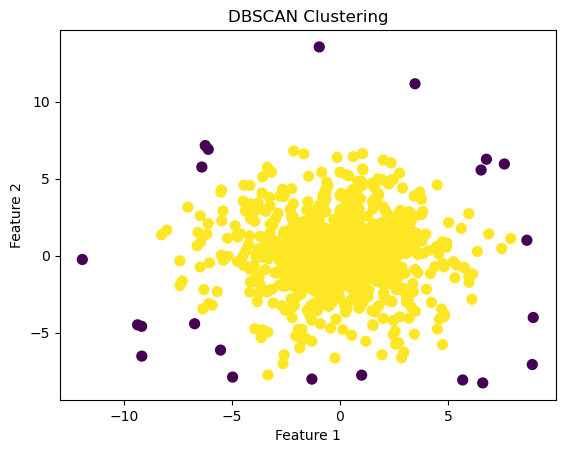

Detected outliers:
[[ -6.239971     7.1427097 ]
 [ -6.732296    -4.422344  ]
 [  8.950882    -4.016506  ]
 [ -6.1007276    6.899186  ]
 [  6.783247     6.2559795 ]
 [  6.536806     5.556959  ]
 [  5.6833773   -8.07105   ]
 [  6.612858    -8.26259   ]
 [  7.6147637    5.9480867 ]
 [  3.4753523   11.153745  ]
 [ -0.9594371   13.546122  ]
 [-11.933269    -0.25107014]
 [ -9.186544    -4.588459  ]
 [ -6.398229     5.751019  ]
 [ -5.5320024   -6.132093  ]
 [ -9.375305    -4.492064  ]
 [  1.0042644   -7.758295  ]
 [  8.656863     0.997738  ]
 [ -9.177508    -6.522699  ]
 [ -4.972025    -7.8843727 ]
 [ -1.3007855   -8.014343  ]
 [  8.907332    -7.0687284 ]]


In [13]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# 使用DBSCAN进行聚类
dbscan = DBSCAN(eps=1.8, min_samples=10)
clusters = dbscan.fit_predict(data_reduced)

# 可视化结果
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=clusters, cmap='viridis', marker='o', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# 异常值（噪声点）
outliers = data_reduced[clusters == -1]
print("Detected outliers:")
print(outliers)

In [14]:
print(outliers.shape)

(22, 2)


3600(2996-3036) == 1800(1498-1518)

In [15]:
for element in outliers:
    indices = np.where(data_reduced == element)
    if len([0]) > 0:
        print(f"元素 {element} 在数组中的位置是: {indices[0][0]}")
    else:
        print(f"元素 {element} 不在数组中")

元素 [-6.239971   7.1427097] 在数组中的位置是: 390
元素 [-6.732296 -4.422344] 在数组中的位置是: 391
元素 [ 8.950882 -4.016506] 在数组中的位置是: 392
元素 [-6.1007276  6.899186 ] 在数组中的位置是: 427
元素 [6.783247  6.2559795] 在数组中的位置是: 586
元素 [6.536806 5.556959] 在数组中的位置是: 610
元素 [ 5.6833773 -8.07105  ] 在数组中的位置是: 660
元素 [ 6.612858 -8.26259 ] 在数组中的位置是: 661
元素 [7.6147637 5.9480867] 在数组中的位置是: 668
元素 [ 3.4753523 11.153745 ] 在数组中的位置是: 678
元素 [-0.9594371 13.546122 ] 在数组中的位置是: 679
元素 [-11.933269    -0.25107014] 在数组中的位置是: 695
元素 [-9.186544 -4.588459] 在数组中的位置是: 725
元素 [-6.398229  5.751019] 在数组中的位置是: 752
元素 [-5.5320024 -6.132093 ] 在数组中的位置是: 783
元素 [-9.375305 -4.492064] 在数组中的位置是: 799
元素 [ 1.0042644 -7.758295 ] 在数组中的位置是: 814
元素 [8.656863 0.997738] 在数组中的位置是: 1502
元素 [-9.177508 -6.522699] 在数组中的位置是: 1510
元素 [-4.972025  -7.8843727] 在数组中的位置是: 1515
元素 [-1.3007855 -8.014343 ] 在数组中的位置是: 1522
元素 [ 8.907332  -7.0687284] 在数组中的位置是: 1524
